# Project: Investigate a Dataset (European Soccer Database!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset Description**: The dataset contains over 25k+ matches, players & teams attributes for European Professional Football.. The ultimate Soccer database for data analysis and machine learning:
> The dataset conains, +25,000 matches, +10,000 players, 11 European Countries with their lead championship
Seasons 2008/2009 to 2015/2016, Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates, Team line up with squad formation (X, Y coordinates), Betting odds from up to 10 providers, Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches
>
> **Questions to Tackle** 

1. What teams improved the most over the time period?

2. Who are the best players?

3. How Does Players Preffered Foot Correlate With Their Potential

4. How does the players attributes relates with each other

5. What method do teams use to create chances. How Does the team attributes relates to each other



We will answer these and many more questions 


In [1]:
#importing packages 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as dt
%matplotlib inline 

#for statistical analysis 
import scipy
from scipy.stats import chisquare
from bioinfokit.analys import stat
%matplotlib inline 

pd.set_option('display.max_colwidth', None) #to display all columns in the dataframe
pd.set_option('display.max_columns', None )

import warnings
warnings.filterwarnings('ignore')

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#loading datasets
#creating a list containing all datasets 
list_of_names=['Country', 'League', 'Player', 'Team', 'Team_Attributes', 'Player_Attributes', 'Match']

#create empty list for datasets
dataframe_list=[]

#appending datasets into the list 
for i in range(len(list_of_names)):
    df=pd.read_csv('C:/Users/Owner/Desktop/Udacity BI NanoDegree\Data Analysis with python\Project 1/'+list_of_names[i]+'.csv')
    dataframe_list.append(df)

In [3]:
#calling each of the datasets 
countries=dataframe_list[0]
league=dataframe_list[1]
players=dataframe_list[2]
teams=dataframe_list[3]
team_attributes=dataframe_list[4]
player_attributes=dataframe_list[5]
matches=dataframe_list[6]

Here I created a list of the datasets names, and wrote a for loop to read the files from the folder from my local computer. I used indexing to select each dataframe 

In [4]:
#having a look at the countries data 
countries.head(3)

,id,name
0,1,Belgium
1,1729,England
2,4769,France


In [5]:
league.head(3)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1


In [6]:
#having a look at the players data 
players.head(3)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163


In [7]:
#having a look at the teams data 
teams.head(3)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL


In [8]:
#having a look at the team attributes data 
team_attributes.head(3)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [9]:
#having a look at the player_attributes data 
player_attributes.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0


In [10]:
matches.head(3)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.4,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.8,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.2,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.9,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.3,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.5,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


##### Wrangling The Player Attributes Data 

In [11]:
#mapping columns from the players  to the player attributes data 

player_attributes['player']=player_attributes['player_fifa_api_id'].map(dict(zip(players['player_fifa_api_id'],\
                                                                                 players['player_name'])))


Here I added a column from the players data to the players attributes data using the map function.

In [12]:
#checking if our changes has been effected
player_attributes.head(3)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye


In [13]:
#Selecting columns we need from the player attributes data 
players_final=player_attributes[['id','player', 'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
                       'finishing', 'dribbling', 'free_kick_accuracy', 'ball_control', 'acceleration', 
                      'sprint_speed', 'shot_power', 'stamina', 'interceptions', 'positioning', 'gk_reflexes', 'penalties', 
                                 'gk_handling']]

In [14]:
players_final.head(3)

,id,player,overall_rating,potential,preferred_foot,attacking_work_rate,finishing,dribbling,free_kick_accuracy,ball_control,acceleration,sprint_speed,shot_power,stamina,interceptions,positioning,gk_reflexes,penalties,gk_handling
0,1,Aaron Appindangoye,67.0,71.0,right,medium,44.0,51.0,39.0,49.0,60.0,64.0,55.0,54.0,70.0,45.0,8.0,48.0,11.0
1,2,Aaron Appindangoye,67.0,71.0,right,medium,44.0,51.0,39.0,49.0,60.0,64.0,55.0,54.0,70.0,45.0,8.0,48.0,11.0
2,3,Aaron Appindangoye,62.0,66.0,right,medium,44.0,51.0,39.0,49.0,60.0,64.0,55.0,54.0,41.0,45.0,8.0,48.0,11.0


Here we selected columns that will be relevant to the analysis

##### Wrangling Matches Data 

In [15]:
matches.head(3)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.4,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.8,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.0,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.2,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.9,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.8,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.3,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.5,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.5,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75


In [16]:
#having a look at the columns in the matches dataset 
for a, b in enumerate(matches.columns):
    print(a,b)

0 id
1 country_id
2 league_id
3 season
4 stage
5 date
6 match_api_id
7 home_team_api_id
8 away_team_api_id
9 home_team_goal
10 away_team_goal
11 home_player_X1
12 home_player_X2
13 home_player_X3
14 home_player_X4
15 home_player_X5
16 home_player_X6
17 home_player_X7
18 home_player_X8
19 home_player_X9
20 home_player_X10
21 home_player_X11
22 away_player_X1
23 away_player_X2
24 away_player_X3
25 away_player_X4
26 away_player_X5
27 away_player_X6
28 away_player_X7
29 away_player_X8
30 away_player_X9
31 away_player_X10
32 away_player_X11
33 home_player_Y1
34 home_player_Y2
35 home_player_Y3
36 home_player_Y4
37 home_player_Y5
38 home_player_Y6
39 home_player_Y7
40 home_player_Y8
41 home_player_Y9
42 home_player_Y10
43 home_player_Y11
44 away_player_Y1
45 away_player_Y2
46 away_player_Y3
47 away_player_Y4
48 away_player_Y5
49 away_player_Y6
50 away_player_Y7
51 away_player_Y8
52 away_player_Y9
53 away_player_Y10
54 away_player_Y11
55 home_player_1
56 home_player_2
57 home_player_3
58 home

In [17]:
#creating a new column for home and away teams goals difference
matches['HomeTeamGD']=matches['home_team_goal']-matches['away_team_goal']  
matches['AwayTeamGD']=matches['away_team_goal']-matches['home_team_goal']
#creating a column for drwan matches 
matches['Draw']=matches['home_team_goal']==matches['away_team_goal']

In [18]:
#adding a column for teams match status 
def match_status(initial = 0):
    if initial > 0:
        return 'W'
    elif initial == 0:
        return 'D'
    else:
        return 'L'
matches['HomeResults'] = matches['HomeTeamGD'].apply(match_status)
matches['AwayResults'] = matches['AwayTeamGD'].apply(match_status)

In [19]:
#calculating points for teams (win=3, draw=1, lose=0)
def match_status2(initial2 = 'w'):
    if initial2 =='W':
        return 3
    elif initial2 =='D':
        return 1
    else:
        return 0
matches['HTPoints'] = matches['HomeResults'].apply(match_status2)
matches['ATPoints'] = matches['AwayResults'].apply(match_status2)

In [20]:
#counting the number of wins for each team
def check_wins(wins='W'):
    
    if wins=='W':
        
        return 1
    else:
        return 0
    
matches['HomeWin'] = matches['HomeResults'].apply(check_wins)
matches['AwayWin'] = matches['AwayResults'].apply(check_wins)

In [21]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,HomeTeamGD,AwayTeamGD,Draw,HomeResults,AwayResults,HTPoints,ATPoints,HomeWin,AwayWin
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,0,0,True,D,D,1,1,0,0
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,0,0,True,D,D,1,1,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,-3,3,False,L,W,0,3,0,1
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,5,-5,False,W,L,3,0,1,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,-2,2,False,L,W,0,3,0,1


In [22]:
#mapping the relevant columns from the league, countries, and teams to the matches dataset 
matches['league'] = matches['league_id'].map(dict(zip(league['country_id'],league['name'])))
matches['countries'] = matches['country_id'].map(dict(zip(countries['id'], countries['name'])))
matches['HomeTeam'] = matches['home_team_api_id'].map(dict(zip(teams['team_api_id'], teams['team_long_name'])))
matches['AwayTeam']= matches['away_team_api_id'].map(dict(zip(teams['team_api_id'], teams['team_long_name'])))



Here I picked columns from the countries data, league data, and teams data and added it to the matches data to be able to achieve what we want 

In [23]:
#selecting only columns we need from the matches data 
matches_final=matches[['id', 'date', 'league','countries','HomeTeam','AwayTeam', 'season','stage',
                       'home_team_goal', 'away_team_goal', 
                       'HTPoints','ATPoints', 'HomeWin', 'AwayWin']]
matches_final.head(3)

,id,date,league,countries,HomeTeam,AwayTeam,season,stage,home_team_goal,away_team_goal,HTPoints,ATPoints,HomeWin,AwayWin
0,1,2008-08-17 00:00:00,Belgium Jupiler League,Belgium,KRC Genk,Beerschot AC,2008/2009,1,1,1,1,1,0,0
1,2,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,SV Zulte-Waregem,Sporting Lokeren,2008/2009,1,0,0,1,1,0,0
2,3,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,KSV Cercle Brugge,RSC Anderlecht,2008/2009,1,0,3,0,3,0,1


##### Wrangling the Team Attributes Data 

In [24]:
#we will a add column from the matches data that constitutes the winning percentage to be able to solve more problems 
team_attributes.head(3)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [25]:
#selecting the columns relevant for our teams analysis 
teams_attr=team_attributes[['id','team_fifa_api_id','team_api_id', 'defenceAggression', 'defenceAggressionClass',
                            'defenceTeamWidth','defenceTeamWidthClass', 'chanceCreationPassing', 'buildUpPlaySpeedClass', 
                  'buildUpPlayPositioningClass', 'buildUpPlayPassingClass', 'buildUpPlayPassing','chanceCreationCrossing', 
                           'chanceCreationPassing', 'buildUpPlaySpeed', 'defenceDefenderLineClass']]

In [26]:
#adding the teams names to the teams attributes 
teams_attr['team']=teams_attr['team_api_id'].map(dict(zip(teams['team_api_id'], teams['team_long_name'])))


I selected the names of the teams from the teams data and mapped it to the teams attributes data which did not have the names of the teams but their ids

In [27]:
#selecting the columns relevant for our teams analysis 
teams_attr_final=teams_attr[['id','team_fifa_api_id','team_api_id', 'team', 'defenceAggression', 'defenceAggressionClass',
                            'defenceTeamWidth','defenceTeamWidthClass', 
                        'buildUpPlayPositioningClass', 'buildUpPlayPassingClass', 'buildUpPlayPassing','chanceCreationCrossing',
                              'buildUpPlaySpeed']]
teams_attr_final.head()

,id,team_fifa_api_id,team_api_id,team,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,buildUpPlayPositioningClass,buildUpPlayPassingClass,buildUpPlayPassing,chanceCreationCrossing,buildUpPlaySpeed
0,1,434,9930,FC Aarau,55,Press,45,Normal,Organised,Mixed,50,65,60
1,2,434,9930,FC Aarau,44,Press,54,Normal,Organised,Mixed,56,63,52
2,3,434,9930,FC Aarau,44,Press,54,Normal,Organised,Mixed,54,63,47
3,4,77,8485,Aberdeen,70,Double,70,Wide,Organised,Long,70,70,70
4,5,77,8485,Aberdeen,47,Press,52,Normal,Organised,Mixed,52,48,47


**During the data wrangling stage, I combined and added columns to the data to get only 3 dataset from the 7 datasets for which I will be working with. The matches data, the player atributes data and the teams attributes data**

### Data Cleaning 

In [28]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


##### Players Attributes Data 

In [29]:
#cleaning the players attributes data 
players_final.head(2)

,id,player,overall_rating,potential,preferred_foot,attacking_work_rate,finishing,dribbling,free_kick_accuracy,ball_control,acceleration,sprint_speed,shot_power,stamina,interceptions,positioning,gk_reflexes,penalties,gk_handling
0,1,Aaron Appindangoye,67.0,71.0,right,medium,44.0,51.0,39.0,49.0,60.0,64.0,55.0,54.0,70.0,45.0,8.0,48.0,11.0
1,2,Aaron Appindangoye,67.0,71.0,right,medium,44.0,51.0,39.0,49.0,60.0,64.0,55.0,54.0,70.0,45.0,8.0,48.0,11.0


In [30]:
print('There are {} rows and {} columns in the players attributes dataset'.format(players_final.shape[0], players_final.shape[1]))

There are 183978 rows and 19 columns in the players attributes dataset


In [31]:
#descriptive statistics of the players attributes 
players_final.describe()

,id,overall_rating,potential,finishing,dribbling,free_kick_accuracy,ball_control,acceleration,sprint_speed,shot_power,stamina,interceptions,positioning,gk_reflexes,penalties,gk_handling
count,183978.00000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,68.600015,73.460353,49.921078,59.175154,49.380950,63.388879,67.659357,68.051244,61.808427,67.038544,52.009271,55.786504,16.441439,55.003986,16.063612
std,53110.01825,7.041139,6.592271,19.038705,17.744688,17.831746,15.196671,12.983326,12.569721,16.135143,13.165262,19.450133,18.448292,17.198155,15.546519,15.867382
min,1.00000,33.000000,39.000000,1.000000,1.000000,1.000000,5.000000,10.000000,12.000000,2.000000,10.000000,1.000000,2.000000,1.000000,2.000000,1.000000
25%,45995.25000,64.000000,69.000000,34.000000,52.000000,36.000000,58.000000,61.000000,62.000000,54.000000,61.000000,34.000000,45.000000,8.000000,45.000000,8.000000
50%,91989.50000,69.000000,74.000000,53.000000,64.000000,50.000000,67.000000,69.000000,69.000000,65.000000,69.000000,57.000000,60.000000,11.000000,57.000000,11.000000
75%,137983.75000,73.000000,78.000000,65.000000,72.000000,63.000000,73.000000,77.000000,77.000000,73.000000,76.000000,68.000000,69.000000,15.000000,67.000000,15.000000
max,183978.00000,94.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,96.000000,96.000000,96.000000,96.000000,96.000000,93.000000


There are 183978 players in the dataset. The highest overall rating to achive by a player is 94 and the lowest being 33. The mean player overall rating is 69. The highet potential achieved by a player is 97. 

In [32]:
#concise summary of the players data 
players_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player               183929 non-null  object 
 2   overall_rating       183142 non-null  float64
 3   potential            183142 non-null  float64
 4   preferred_foot       183142 non-null  object 
 5   attacking_work_rate  180748 non-null  object 
 6   finishing            183142 non-null  float64
 7   dribbling            183142 non-null  float64
 8   free_kick_accuracy   183142 non-null  float64
 9   ball_control         183142 non-null  float64
 10  acceleration         183142 non-null  float64
 11  sprint_speed         183142 non-null  float64
 12  shot_power           183142 non-null  float64
 13  stamina              183142 non-null  float64
 14  interceptions        183142 non-null  float64
 15  positioning      

All variables are in the correct data type. 

In [33]:
#let's Detect missing values
players_final.isna().sum()

id                        0
player                   49
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
finishing               836
dribbling               836
free_kick_accuracy      836
ball_control            836
acceleration            836
sprint_speed            836
shot_power              836
stamina                 836
interceptions           836
positioning             836
gk_reflexes             836
penalties               836
gk_handling             836
dtype: int64

In [34]:
#let's look at the percentage of null values in the players data 
players_final.isna().sum()/len(players_final)*100

id                     0.000000
player                 0.026634
overall_rating         0.454402
potential              0.454402
preferred_foot         0.454402
attacking_work_rate    1.755645
finishing              0.454402
dribbling              0.454402
free_kick_accuracy     0.454402
ball_control           0.454402
acceleration           0.454402
sprint_speed           0.454402
shot_power             0.454402
stamina                0.454402
interceptions          0.454402
positioning            0.454402
gk_reflexes            0.454402
penalties              0.454402
gk_handling            0.454402
dtype: float64

almost all the variables that has missing values is about 0.45%. That is less than 1%. We will drop these columns. It makes sense to drop them since they are very few 

In [35]:
#checking for number of distinct observations in the teams attributes  data
players_final.nunique()

id                     183978
player                  10848
overall_rating             61
potential                  56
preferred_foot              2
attacking_work_rate         8
finishing                  97
dribbling                  97
free_kick_accuracy         97
ball_control               93
acceleration               86
sprint_speed               85
shot_power                 96
stamina                    84
interceptions              96
positioning                95
gk_reflexes                92
penalties                  94
gk_handling                90
dtype: int64

In [36]:
#since the null values in the columns are less than 1%, we can choose to drop these null values. Let's drop
players_final.dropna(axis=0, inplace=True)

In [37]:
#lets check if the changes has been effected 
players_final.isna().sum()

id                     0
player                 0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
finishing              0
dribbling              0
free_kick_accuracy     0
ball_control           0
acceleration           0
sprint_speed           0
shot_power             0
stamina                0
interceptions          0
positioning            0
gk_reflexes            0
penalties              0
gk_handling            0
dtype: int64

In [38]:
#checking for duplicates 
players_final.duplicated().sum()  #no duplicates, good

0

The players attributes is now cleaned, I checked for null values and drooped them since the number of null value sis too small.
I also checked for the correctness of the datatypes as well as checking for duplicates. There is no outlier or inconsistencies in the data. good to go

##### Matches Data 

In [39]:
matches_final.head(3)

,id,date,league,countries,HomeTeam,AwayTeam,season,stage,home_team_goal,away_team_goal,HTPoints,ATPoints,HomeWin,AwayWin
0,1,2008-08-17 00:00:00,Belgium Jupiler League,Belgium,KRC Genk,Beerschot AC,2008/2009,1,1,1,1,1,0,0
1,2,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,SV Zulte-Waregem,Sporting Lokeren,2008/2009,1,0,0,1,1,0,0
2,3,2008-08-16 00:00:00,Belgium Jupiler League,Belgium,KSV Cercle Brugge,RSC Anderlecht,2008/2009,1,0,3,0,3,0,1


In [40]:
print('There are {} rows and {} columns in the dataset'.format(matches_final.shape[0],matches_final.shape[1]))

There are 25979 rows and 14 columns in the dataset


In [41]:
#descriptive statistics of matches
matches_final.describe()

,id,stage,home_team_goal,away_team_goal,HTPoints,ATPoints,HomeWin,AwayWin
count,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000,25979.000000
mean,12990.000000,18.242773,1.544594,1.160938,1.630047,1.116055,0.458717,0.287386
std,7499.635658,10.407354,1.297158,1.142110,1.313529,1.262875,0.498302,0.452552
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6495.500000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12990.000000,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,19484.500000,27.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000
max,25979.000000,38.000000,10.000000,9.000000,3.000000,3.000000,1.000000,1.000000


25979 matches has been played over the 8 years. 38 matches per season. The maximum number of home goals scored is 10 with the maximum for away being 9. Home teams ammasses more points than way teams with the average home points being 1.6 and away been 1.1

In [42]:
#consise summary of the matches dataframe 
matches_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              25979 non-null  int64 
 1   date            25979 non-null  object
 2   league          25979 non-null  object
 3   countries       25979 non-null  object
 4   HomeTeam        25979 non-null  object
 5   AwayTeam        25979 non-null  object
 6   season          25979 non-null  object
 7   stage           25979 non-null  int64 
 8   home_team_goal  25979 non-null  int64 
 9   away_team_goal  25979 non-null  int64 
 10  HTPoints        25979 non-null  int64 
 11  ATPoints        25979 non-null  int64 
 12  HomeWin         25979 non-null  int64 
 13  AwayWin         25979 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 2.8+ MB


From the output of the consise summary, all data types are correct with the exception of the date column. This needs to be changed from the object data type to the correct data type, datetime

In [43]:
#converting the date column to the correct datatype, datetime 
matches_final['date']= pd.to_datetime(matches_final['date'])

In [44]:
#lets check if the changes has been effected 
matches_final.dtypes  #changes effected 

id                         int64
date              datetime64[ns]
league                    object
countries                 object
HomeTeam                  object
AwayTeam                  object
season                    object
stage                      int64
home_team_goal             int64
away_team_goal             int64
HTPoints                   int64
ATPoints                   int64
HomeWin                    int64
AwayWin                    int64
dtype: object

In [45]:
#checking for number of distinct observations in the teams attributes  data
matches_final.nunique()

id                25979
date               1694
league               11
countries            11
HomeTeam            296
AwayTeam            296
season                8
stage                38
home_team_goal       11
away_team_goal       10
HTPoints              3
ATPoints              3
HomeWin               2
AwayWin               2
dtype: int64

In [46]:
#checking for null values 
matches_final.isnull().sum()  #no null values, good to go 

id                0
date              0
league            0
countries         0
HomeTeam          0
AwayTeam          0
season            0
stage             0
home_team_goal    0
away_team_goal    0
HTPoints          0
ATPoints          0
HomeWin           0
AwayWin           0
dtype: int64

In [47]:
#checking for duplicates 
matches_final.duplicated(keep=False).sum()  #no duplicates as well

0

For the matches data, I changed the date column from object data type to datetime. All other columns are in the correct format. 
There is no null values, duplicates, anomalies or inconsistent values as well. Good to go

##### Team Attributes Dataset

In [48]:
teams_attr_final.head()

,id,team_fifa_api_id,team_api_id,team,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,buildUpPlayPositioningClass,buildUpPlayPassingClass,buildUpPlayPassing,chanceCreationCrossing,buildUpPlaySpeed
0,1,434,9930,FC Aarau,55,Press,45,Normal,Organised,Mixed,50,65,60
1,2,434,9930,FC Aarau,44,Press,54,Normal,Organised,Mixed,56,63,52
2,3,434,9930,FC Aarau,44,Press,54,Normal,Organised,Mixed,54,63,47
3,4,77,8485,Aberdeen,70,Double,70,Wide,Organised,Long,70,70,70
4,5,77,8485,Aberdeen,47,Press,52,Normal,Organised,Mixed,52,48,47


In [49]:
print('There are {} rows and {} columns in the dataset'.format(teams_attr_final.shape[0],teams_attr_final.shape[1]))

There are 1458 rows and 13 columns in the dataset


In [50]:
#descriptive statistics of the teams attributes data 
teams_attr_final.describe()

,id,team_fifa_api_id,team_api_id,defenceAggression,defenceTeamWidth,buildUpPlayPassing,chanceCreationCrossing,buildUpPlaySpeed
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,49.251029,52.185871,48.490398,53.731824,52.462277
std,421.032659,39179.857739,13264.869900,9.738028,9.574712,10.896101,11.086796,11.545869
min,1.000000,1.000000,1601.000000,24.000000,29.000000,20.000000,20.000000,20.000000
25%,365.250000,110.000000,8457.750000,44.000000,47.000000,40.000000,47.000000,45.000000
50%,729.500000,485.000000,8674.000000,48.000000,52.000000,50.000000,53.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,55.000000,58.000000,55.000000,62.000000,62.000000
max,1458.000000,112513.000000,274581.000000,72.000000,73.000000,80.000000,80.000000,80.000000


Most of the teams attributes has a maximum value of 80 and minimum being 20. The mean for teams attributes stays around 52 and 53

In [51]:
#concise summary of the data 
teams_attr_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           1458 non-null   int64 
 1   team_fifa_api_id             1458 non-null   int64 
 2   team_api_id                  1458 non-null   int64 
 3   team                         1458 non-null   object
 4   defenceAggression            1458 non-null   int64 
 5   defenceAggressionClass       1458 non-null   object
 6   defenceTeamWidth             1458 non-null   int64 
 7   defenceTeamWidthClass        1458 non-null   object
 8   buildUpPlayPositioningClass  1458 non-null   object
 9   buildUpPlayPassingClass      1458 non-null   object
 10  buildUpPlayPassing           1458 non-null   int64 
 11  chanceCreationCrossing       1458 non-null   int64 
 12  buildUpPlaySpeed             1458 non-null   int64 
dtypes: int64(8), object(5)
memory usa

In [52]:
#checking for null values 
teams_attr_final.isnull().sum()  #no null values detected 

id                             0
team_fifa_api_id               0
team_api_id                    0
team                           0
defenceAggression              0
defenceAggressionClass         0
defenceTeamWidth               0
defenceTeamWidthClass          0
buildUpPlayPositioningClass    0
buildUpPlayPassingClass        0
buildUpPlayPassing             0
chanceCreationCrossing         0
buildUpPlaySpeed               0
dtype: int64

In [53]:
#checking for number of distinct observations in the teams attributes  data
teams_attr_final.nunique()

id                             1458
team_fifa_api_id                285
team_api_id                     288
team                            285
defenceAggression                47
defenceAggressionClass            3
defenceTeamWidth                 43
defenceTeamWidthClass             3
buildUpPlayPositioningClass       2
buildUpPlayPassingClass           3
buildUpPlayPassing               58
chanceCreationCrossing           56
buildUpPlaySpeed                 57
dtype: int64

In [54]:
#checking for duplicates 
teams_attr_final.duplicated().sum() #no duplicates detected 

0

All datatypes are in the right format, no null values, no duplicates or anomalies detected. good to work 

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What teams improved the most over the time period?)

**a. Comparing home and Away Teams Goals**

In [55]:
#writing a function to plot the distribution of goals for home and away teams 
def plotting(df, x):
    print(df[x].describe())
    plt.title(x)
    plt.xlabel(x)
    plt.ylabel('frequency')
    plt.hist(df[x])

count    25979.000000
mean         1.544594
std          1.297158
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: home_team_goal, dtype: float64


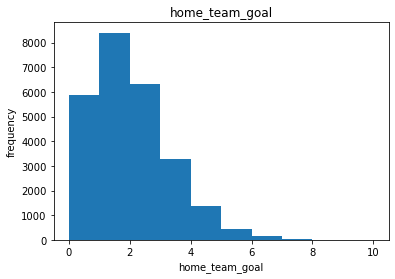

In [56]:
plotting(matches_final, 'home_team_goal')

count    25979.000000
mean         1.160938
std          1.142110
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: away_team_goal, dtype: float64


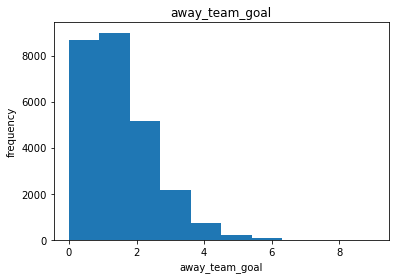

In [57]:
#distribution of wins for home teams 
plotting(matches_final, 'away_team_goal')

The average home goals is 1.5 as compared to the average away goals (1.2). Thus, home teams score more goals than away teams do. 


**b. Comparing Home and Away Teams Points** 

In [58]:
#writing a function to plot the distribution of goals for gome and away taems 
def count_win(df, x):
    print(df[x].describe(include='object'))
    plt.title(x)
    sns.countplot(df[x])

count    25979.000000
mean         1.630047
std          1.313529
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: HTPoints, dtype: float64


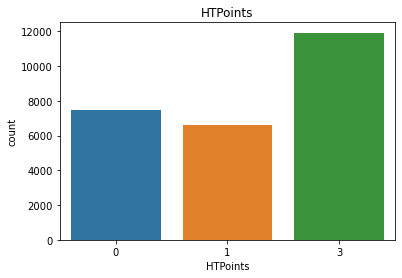

In [59]:
count_win(matches_final, 'HTPoints')

count    25979.000000
mean         1.116055
std          1.262875
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: ATPoints, dtype: float64


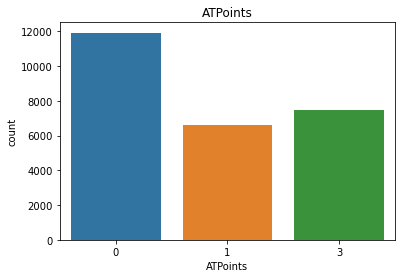

In [60]:
count_win(matches_final, 'ATPoints')

From the graphs, Home teams mostly takes the 3 maximum points as oppossed to the away teams.

**c. Which team has more Home wins**

                   HomeWin
HomeTeam                  
FC Barcelona           131
Real Madrid CF         129
Celtic                 120
Manchester United      116
Manchester City        113


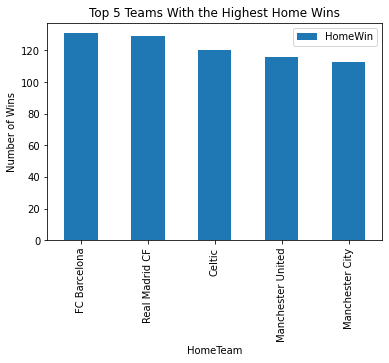

In [61]:
#let's see the top home teams by matches won at home
print(matches_final.groupby('HomeTeam')[['HomeWin']].sum().sort_values(by='HomeWin', ascending=False).head())
matches_final.groupby('HomeTeam')[['HomeWin']].sum().sort_values(by='HomeWin', ascending=False).head().plot.bar()
plt.title('Top 5 Teams With the Highest Home Wins')
plt.ylabel('Number of Wins');

**d. Which team has more Home wins**

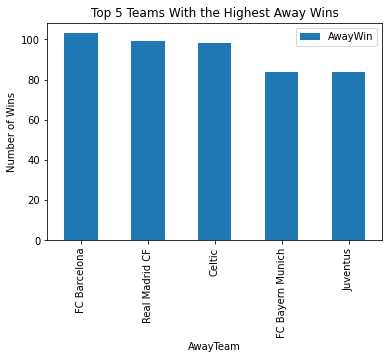

In [62]:
#let's see the top home teams by away matches won

matches_final.groupby('AwayTeam')[['AwayWin']].sum().sort_values(by='AwayWin', ascending=False).head().plot.bar()
plt.title('Top 5 Teams With the Highest Away Wins')
plt.ylabel('Number of Wins');

Barcelona has been the best team interms of matches won both home and away. Then followd by their bitterest rivals, Real Madrid

**e. What team has the best home performnce in terms of points accumulated**

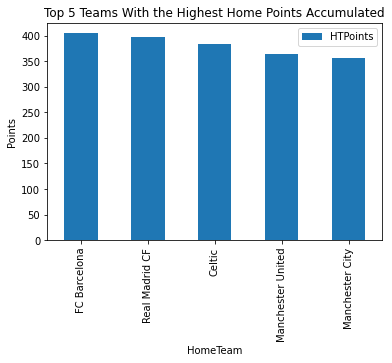

In [63]:
#let's see the top home teams by away matches won

matches_final.groupby('HomeTeam')[['HTPoints']].sum().sort_values(by='HTPoints', ascending=False).head().plot.bar()
plt.title('Top 5 Teams With the Highest Home Points Accumulated');
plt.ylabel('Points');

Barcelona once again has ammassed more points than any other team followed by Real Madrid

**f. What team has the best home performnce in terms of points accumulated**

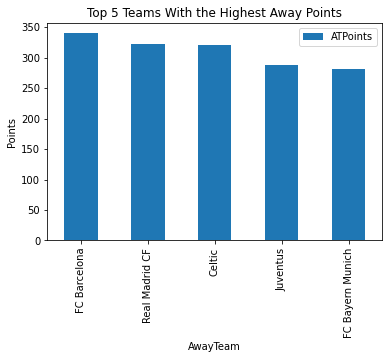

In [64]:
matches_final.groupby('AwayTeam')[['ATPoints']].sum().sort_values(by='ATPoints', ascending=False).head().plot.bar()
plt.title('Top 5 Teams With the Highest Away Points')
plt.ylabel('Points');

As you may expect, Barcelona has ammassed more points both home and away more than any other team. Madrid comes second

**g. Which Team has the most home goals**

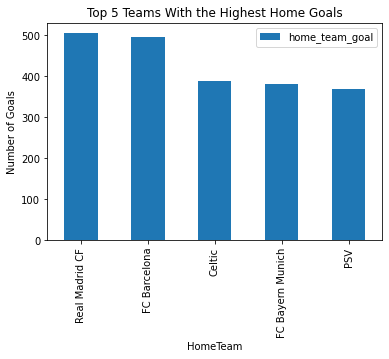

In [65]:
#teams with most home goals

matches_final.groupby('HomeTeam')[['home_team_goal']].sum().sort_values(by='home_team_goal', ascending=False).head().plot.bar()
plt.title('Top 5 Teams With the Highest Home Goals')
plt.ylabel('Number of Goals');

Real Madrid has been very good interms of goals scored at their own backyard, Santiago Bernabau. Barcelona comes second here  

**h. Which Team has the most home goals**

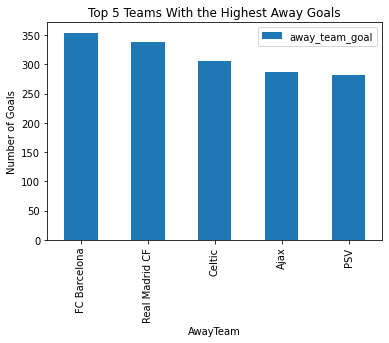

In [66]:
#teams with most away goals
matches_final.groupby('AwayTeam')[['away_team_goal']].sum().sort_values(by='away_team_goal', ascending=False).head().plot.bar()
plt.title('Top 5 Teams With the Highest Away Goals')
plt.ylabel('Number of Goals');

Barcelona scores more at their home yard more than any other team

### Research Question 2  (Who are the Best Players!(Based on Ratings)

In [67]:

players_final.head()

,id,player,overall_rating,potential,preferred_foot,attacking_work_rate,finishing,dribbling,free_kick_accuracy,ball_control,acceleration,sprint_speed,shot_power,stamina,interceptions,positioning,gk_reflexes,penalties,gk_handling
0,1,Aaron Appindangoye,67.0,71.0,right,medium,44.0,51.0,39.0,49.0,60.0,64.0,55.0,54.0,70.0,45.0,8.0,48.0,11.0
1,2,Aaron Appindangoye,67.0,71.0,right,medium,44.0,51.0,39.0,49.0,60.0,64.0,55.0,54.0,70.0,45.0,8.0,48.0,11.0
2,3,Aaron Appindangoye,62.0,66.0,right,medium,44.0,51.0,39.0,49.0,60.0,64.0,55.0,54.0,41.0,45.0,8.0,48.0,11.0
3,4,Aaron Appindangoye,61.0,65.0,right,medium,43.0,50.0,38.0,48.0,60.0,64.0,54.0,54.0,40.0,44.0,7.0,47.0,10.0
4,5,Aaron Appindangoye,61.0,65.0,right,medium,43.0,50.0,38.0,48.0,60.0,64.0,54.0,54.0,40.0,44.0,7.0,47.0,10.0


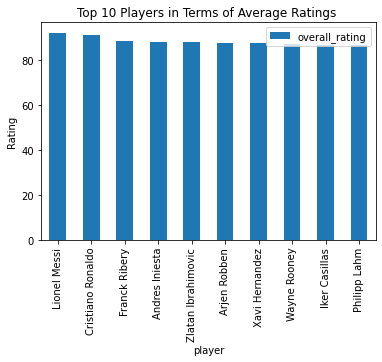

In [68]:
#best players by overall ratings
players_final.groupby('player')[['overall_rating']].mean().sort_values(by='overall_rating', ascending=False)[:10].plot.bar()
plt.title('Top 10 Players in Terms of Average Ratings ');
plt.ylabel('Rating');

As you may expect, Messi tops as the best player with the highest average ratings with a close mark by his toughest competitor Christiano Ronaldo. This obviously has being the case over the years. Barcelona has 3 players in there

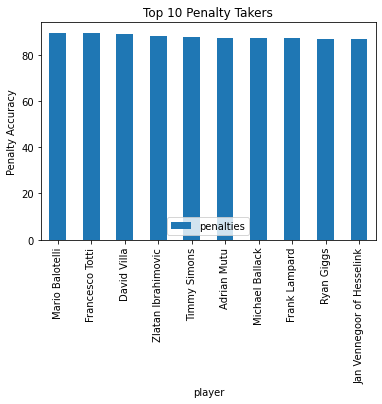

In [69]:
#best penalty takers
players_final.groupby('player')[['penalties']].mean().sort_values(by='penalties', ascending=False)[:10].plot.bar()
plt.title('Top 10 Penalty Takers')
plt.ylabel('Penalty Accuracy');

It's normal to see Mario Balotelli leading as the best penalty converter. He's beng chased by Francesco Totti of Roma. 

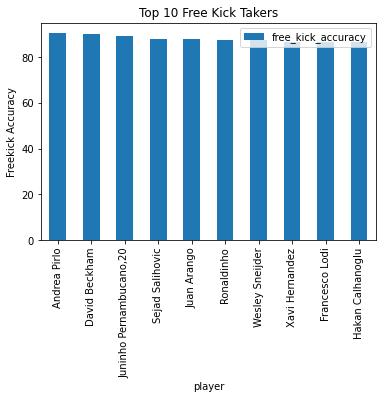

In [70]:
#best penalty takers
players_final.groupby('player')[['free_kick_accuracy']].mean().sort_values(by='free_kick_accuracy',\
                                                                           ascending=False)[:10].plot.bar()
plt.title('Top 10 Free Kick Takers')
plt.ylabel('Freekick Accuracy');

Andrea Pirlo and David Beckham tops the chart of freekick experts 

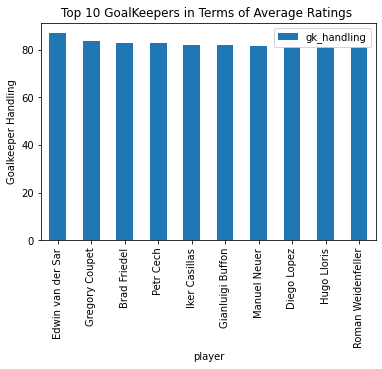

In [71]:
#plotting for best Gk
players_final.groupby('player')[['gk_handling']].mean().sort_values(by='gk_handling', ascending=False)[:10].plot.bar()
plt.title('Top 10 GoalKeepers in Terms of Average Ratings ')
plt.ylabel('Goalkeeper Handling');


Manchester United's Edwin Van der Sar is toping the best goalkeepers interms of goalkeeper handling. Followed by Gregory Coupet and Brad Friedel

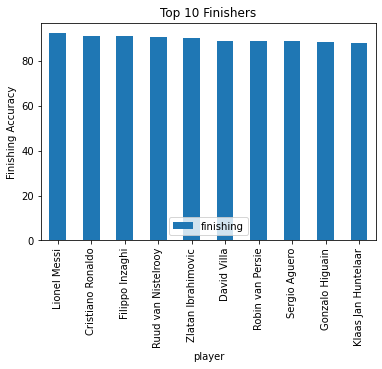

In [72]:
#top finishers 
players_final.groupby('player')[['finishing']].mean().sort_values(by='finishing', ascending=False)[:10].plot.bar()
plt.title('Top 10 Finishers')
plt.ylabel('Finishing Accuracy');

Lionel Messi, arguably the best finisher of the ball. He tops with an average finishing rate of 94. Ronaldo comes next then followed by Filipo Pipo Inzaghi

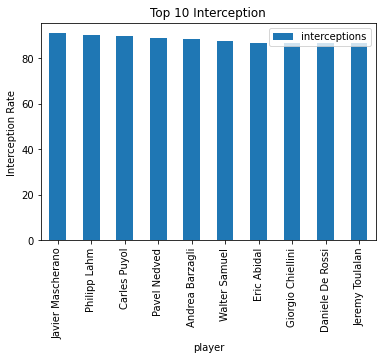

In [73]:

players_final.groupby('player')[['interceptions']].mean().sort_values(by='interceptions', ascending=False)[:10].plot.bar()
plt.title('Top 10 Interception')
plt.ylabel('Interception Rate ');

One main quality perculiar to defenders and defensive midfielders is his ability to intercept. Javier Mascherano is the best in that respect, followed by Philip Lahm of Bayern and Barcelona's Carles Puyol

# 3. Research Question 4 (How Does Players Preffered Foot Correlate With Their Potential)

                penalties
preferred_foot           
left            55.394348
right           54.803495


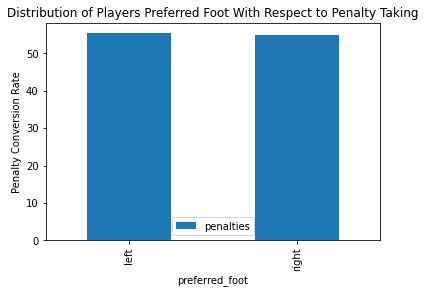

In [74]:
print(players_final.groupby('preferred_foot')[['penalties']].mean())
players_final.groupby('preferred_foot')[['penalties']].mean().plot.bar()
plt.title('Distribution of Players Preferred Foot With Respect to Penalty Taking')
plt.ylabel('Penalty Conversion Rate');

As the analogy goes, left footed players are good penalty takers. This is obvious here. Left Footed players has a slight higher penalty converting rate as compared to right footed players

                potential  overall_rating
preferred_foot                           
left            73.517094       68.646401
right           73.463666       68.626235


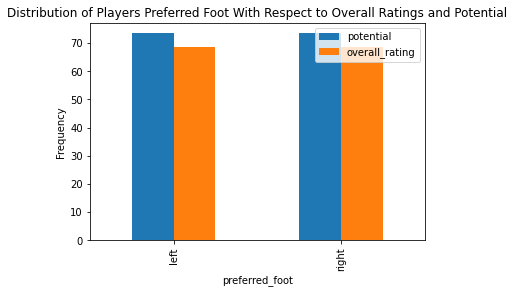

In [75]:
print(players_final.groupby('preferred_foot')[['potential', 'overall_rating']].mean())
players_final.groupby('preferred_foot')[['potential', 'overall_rating']].mean().plot.bar()
plt.title('Distribution of Players Preferred Foot With Respect to Overall Ratings and Potential')
plt.ylabel('Frequency');

On avearge, left footed players are slightly ahead of right footed players based on their potential and overall ratings. This is a close marking

# Research Question 4 (How does the players attributes relates with each other) 

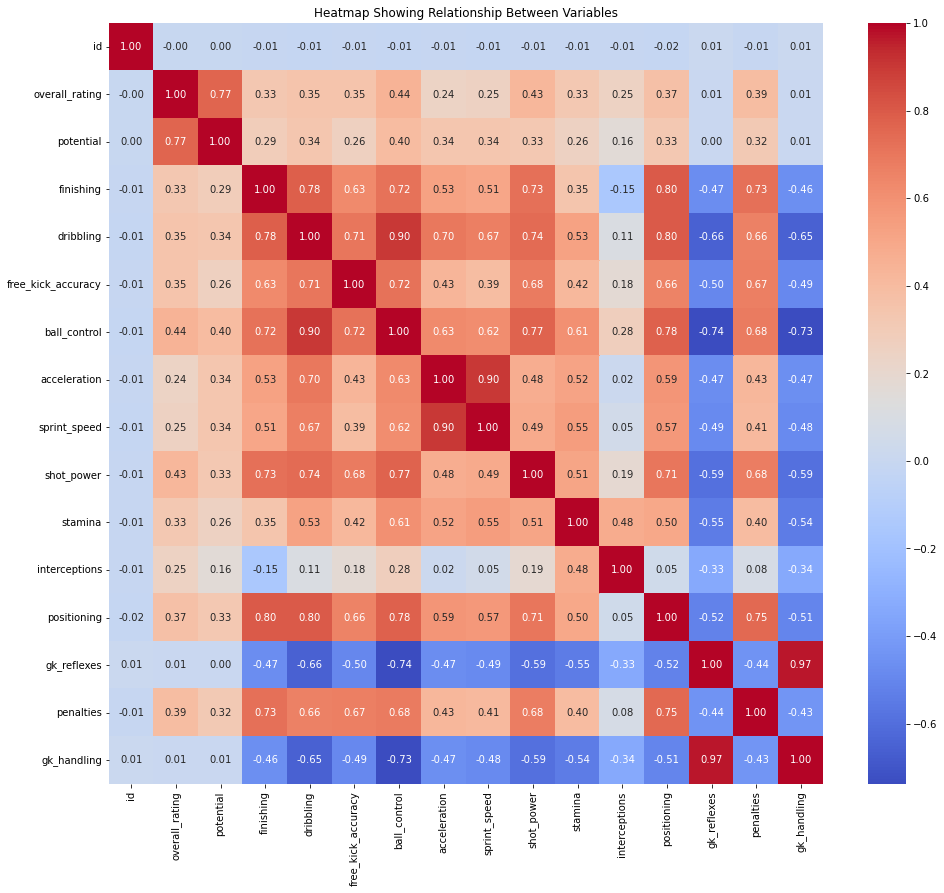

In [76]:
#let's see how these attributes relate with each other with heatmap
plt.figure(figsize=(16,14))
sns.heatmap(players_final.corr(), cmap='coolwarm', annot=True, fmt='.2f').\
set_title('Heatmap Showing Relationship Between Variables');


Correlation values ranges from -1 to 1. 

**1=Positive Correlation**

**-1=Negative Correlation**

**0=No correlation**

Values closer to 1 have a strong positive correlation. i.e as the first variable increases, the other one also increases and vise versa. 

The reverse is when the value is closer to -1. As the fist variable increases, the other variable decerases. A correlation value closer to 0 tends to have no relationship between variables.

From the heatmap,there is a very strong correlation between players potential and overall ratings, meaning the higher a player's potential, the higher his rating. 

The following can also be deduced from the heatmap 

1. Players who have a better ball control, good dribblers, better positioning, and have strong shot power are very good finishers. 
2. Dribbling have a strong positive correlation with free kick accuracy. Good dribblers are better freekick takers
3. Players who have good positioning are very good penalty takers
4. Players who have good interception capabilities tends to have a negative correlation to finishing. Good interceptors are poor at finishing. Macherano barely scores.

In [77]:
teams_attr_final.head()

,id,team_fifa_api_id,team_api_id,team,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,buildUpPlayPositioningClass,buildUpPlayPassingClass,buildUpPlayPassing,chanceCreationCrossing,buildUpPlaySpeed
0,1,434,9930,FC Aarau,55,Press,45,Normal,Organised,Mixed,50,65,60
1,2,434,9930,FC Aarau,44,Press,54,Normal,Organised,Mixed,56,63,52
2,3,434,9930,FC Aarau,44,Press,54,Normal,Organised,Mixed,54,63,47
3,4,77,8485,Aberdeen,70,Double,70,Wide,Organised,Long,70,70,70
4,5,77,8485,Aberdeen,47,Press,52,Normal,Organised,Mixed,52,48,47


# Research Question  5(What are the methods teams use to create chances and How Does the team attributes relates to each other)

**a. What teams creates more chances through crosses**

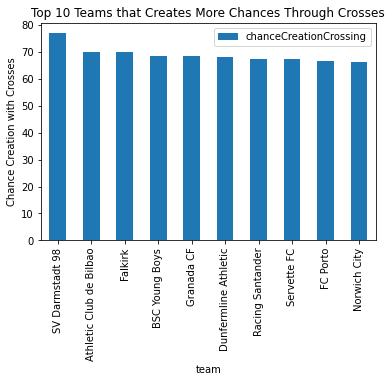

In [78]:
#looking for teams that creates more chances through crosses 
teams_attr_final.groupby('team')[['chanceCreationCrossing']].mean().sort_values\
(by='chanceCreationCrossing',ascending=False)[:10].plot.bar()
plt.title('Top 10 Teams that Creates More Chances Through Crosses')
plt.ylabel('Chance Creation with Crosses');

From the graph above, SV Darmstadt 98 is the team that creates more cances through crosses then followed by Athletico Bilba

**b. What teams has the toughest defense (Aggressiveness)**

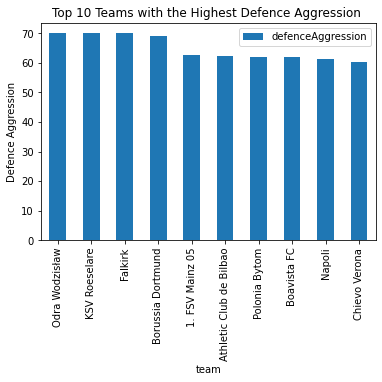

In [79]:
#looking for teams that has the highest defensive aggresion
teams_attr_final.groupby('team')[['defenceAggression']].mean().sort_values\
(by='defenceAggression',ascending=False)[:10].plot.bar()
plt.title('Top 10 Teams with the Highest Defence Aggression ')
plt.ylabel('Defence Aggression');

The graph above shows top 10 teams with the highest defensive aggression. Odra Wodzislaw and KSV Roeselane tops the chart

**c. What teams have the highest speed in build up play**

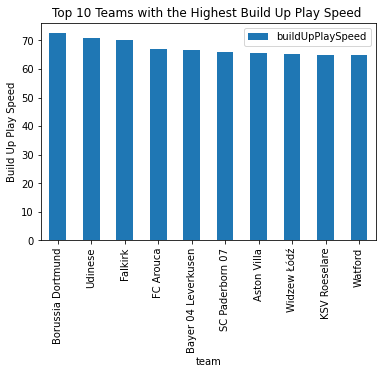

In [80]:
#looking for teams that creates more chances through crosses 
teams_attr_final.groupby('team')[['buildUpPlaySpeed']].mean().sort_values\
(by='buildUpPlaySpeed',ascending=False)[:10].plot.bar()
plt.title('Top 10 Teams with the Highest Build Up Play Speed ')
plt.ylabel('Build Up Play Speed');

Borussia Dortmund is the team that mostly build with speed. They are closely followed by Udinese

Relationship Between Categorical Variables with **Chi Square**

In [81]:
#relationship between players working rate and their preffered foot 
def explore_relationship(df, x, y):
    cross_tab=pd.crosstab(df[x], df[y])
    print('======================================================')
    test=stat()
    test.chisq(df=cross_tab)
    print(test.summary)
    print('Null Hypothesis: {} and {} are independent'.format(x,y))
    print('Altenate Hypothesis: {} and {} are not independent'.format(x,y))
    print('======================================================')
    print('Relationship Between {} and {}'.format(x,y))
    print(pd.crosstab(df[x], df[y]))
    pd.crosstab(df[x], df[y]).plot.bar()
    plt.ylabel('Frequency')

**d. How does build up play positioning correlate with build up play passing**


Chi-squared test for independence

Test              Df    Chi-square      P-value
--------------  ----  ------------  -----------
Pearson            2       66.3444  3.92198e-15
Log-likelihood     2       47.6154  4.57566e-11

Null Hypothesis: buildUpPlayPositioningClass and buildUpPlayPassingClass are independent
Altenate Hypothesis: buildUpPlayPositioningClass and buildUpPlayPassingClass are not independent
Relationship Between buildUpPlayPositioningClass and buildUpPlayPassingClass
buildUpPlayPassingClass      Long  Mixed  Short
buildUpPlayPositioningClass                    
Free Form                       0     47     25
Organised                      94   1189    103


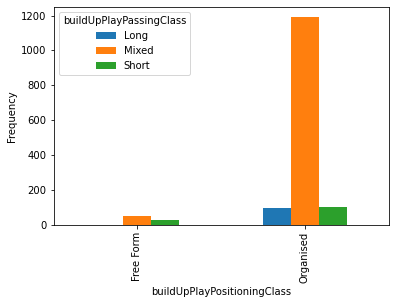

In [82]:
explore_relationship(teams_attr_final ,'buildUpPlayPositioningClass', 'buildUpPlayPassingClass')

since the p value is less than 0.05, we reject the null hypothesis and conclude that there is a relationship between  BuildUp Play Positioning Class and BuildUp Play Passing Class. 

Most teams play with with mixed build up play passing.  

<a id='conclusions'></a>
## Conclusions
A team's victory rate and goals scored are higher when they play at home than when they play away.

1. Barcelona was the most successful team from 2008 to 2016, winning the most games and accruing the most points. Real Madrid is keeping a close eye on them. Real Madrid has scored more goals away from home than Barcelona.

2. The top player with the highest rating and greatest finisher is Lionel Messi, who is followed by Cristiano Ronaldo. Mario Balotelli converts the most penalties, while Andrea Pirlo and David Beckham are the finest freekick specialists. Left-footed players are marginally better penalty takers and have slightly higher overall scores than right-footed players. Finishers have superior ball control, are better dribblers, have better positioning, and have strong shot power.

3. SV Darmstadt 98 is the team that creates the most chances through crosses, followed by Athletico Bilbao. In terms of defensive aggressiveness, Odra Wodzislaw and KSV Roeselane are at the top of the list.


### Limitations

— Because the data was only collected for 8 years, it's difficult to extrapolate conclusions.

— For most years, the matches data contains more redundant data, and part of it was missing.

-- There was a need to establish a relationship between the team's attributes and its winning rate, however due to the data provided, this was not diificult to achieve.

Link to additional resource:
1. [stackoverflow](https://stackoverflow.com/questions/66811137/mapping-values-from-one-column-to-the-values-from-another-column-in-a-pandas-dat)

2. [medium](https://medium.com/analytics-vidhya/european-football-analysis-using-python-b42530e1c6e#wrangling)